<a href="https://colab.research.google.com/github/justingivens9583/CS4410-JG/blob/master/CS4410_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS4410 - Justin Givens - Homework 4

##Loading the Dataset

In [45]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

##Checking the Sample and Target Sizes

In [12]:
breast_cancer.target.size

569

##Splitting the Data for Training and Testing

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11, test_size=0.20)

##Training and Testing Set Sizes

In [15]:
X_train.shape

(455, 30)

In [16]:
X_test.shape

(114, 30)

##Creating the Model

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

##Training the Model

In [18]:
nb.fit(X_train, y_train)

GaussianNB()

##Predicting

In [36]:
predicted = nb.predict(X=X_test)
expected = y_test

print(f'Predicted: {predicted[:20]}')
print(f'Expected:  {expected[:20]}')

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(f'Wrong: {wrong}')

Predicted: [0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
Expected:  [0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]
Wrong: [(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]


##Estimator Method score

In [33]:
test_accuracy = nb.score(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.2f}')

Testing Accuracy: 0.94


##Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=expected, y_pred=predicted)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[32  6]
 [ 1 75]]


##Classification Report

In [47]:
from sklearn.metrics import classification_report
names = [str(data) for data in breast_cancer.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.97      0.84      0.90        38
      benign       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



##Visualizing the Confusion Matrix

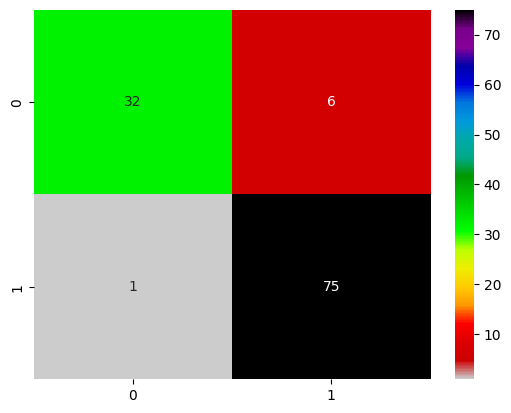

In [42]:
import pandas as pd
confusion_df = pd.DataFrame(cm, index=range(2), columns=range(2))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

##K-Fold Cross-Validation

In [49]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

print(f"Cross-Validation Scores: {scores}")
print(f"Mean accuray: {scores.mean():.2%}")

Cross-Validation Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean accuray: 93.85%


##Running Multiple Models to Find the Best One:   

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
